# Лабораторна робота 2: Базові алгоритми навчання без учителя та обробка текстових даних (Scikit-learn lib)

**Виконав:** Бондар Петро


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

## Завдання 1: Зниження розмірності і візуалізація даних

### Вибір та завантаження датасету
Для виконання цієї лабораторної роботи було обрано датасет з лабораторної роботи 1 (оцінка рівнів ожиріння в людей з Мексико, Перу та Колумбії віком від 14 до 61).
Посилання на датасет: https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster

Виконаємо стандартну обробку датасету.

In [2]:
df_obesity = pd.read_csv('data/ObesityDataSet.csv')
df_obesity = df_obesity.rename(columns={'family_history_with_overweight': 'FAM_OVERWEIGHT', 'NObeyesdad': 'Obesity_level'})
TARGET_VAR = 'Obesity_level'
OTHER_FEATURES = df_obesity.columns.drop(['Obesity_level'])

In [3]:
df_obesity.keys()

Index(['Gender', 'Age', 'Height', 'Weight', 'FAM_OVERWEIGHT', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'Obesity_level'],
      dtype='object')

## Завдання 2: Кластерний аналіз

In [4]:
from PIL import Image

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

In [5]:
image = Image.open('data/cyberpunk_city.jpg')
image_data_scaled = np.array(image, dtype=np.float64) / 255

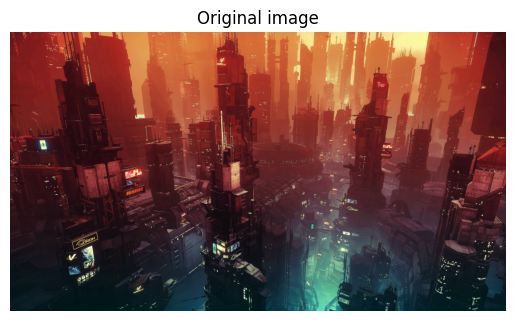

In [6]:
# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image')
plt.imshow(image_data_scaled)

In [7]:
w, h, d = original_shape = tuple(image_data_scaled.shape)
assert d == 3
image_array = np.reshape(image_data_scaled, (w * h, d))

[[0.78       0.42117647 0.26784314]
 [0.30381837 0.11971104 0.14097007]
 [0.65248869 0.25158371 0.18159879]
 [0.06042781 0.13547237 0.17611408]
 [0.36078431 0.57254902 0.50098039]
 [1.         0.86666667 0.6745098 ]
 [0.51848739 0.12422969 0.11708683]
 [0.32773109 0.20672269 0.25770308]
 [0.28657617 0.29864253 0.33514329]
 [0.15106209 0.05       0.07254902]
 [0.88851541 0.57927171 0.31148459]
 [0.50239651 0.1788671  0.18409586]
 [0.39448861 0.10609433 0.11149974]
 [0.15854342 0.20028011 0.25854342]
 [0.76666667 0.63529412 0.59411765]
 [0.07377451 0.05490196 0.07720588]
 [0.65975724 0.17535014 0.13501401]
 [0.51215686 0.33098039 0.33333333]
 [0.21013072 0.18202614 0.2130719 ]
 [0.79744246 0.3887468  0.21653879]
 [0.48039216 0.4754902  0.45686275]
 [0.77183601 0.34937611 0.21069519]
 [0.91294118 0.73490196 0.44156863]
 [0.32562542 0.08830291 0.09722786]
 [0.18431373 0.43529412 0.36862745]
 [0.03452685 0.10477408 0.13043478]
 [0.27127025 0.07519182 0.09070759]
 [0.17019608 0.12862745 0.16

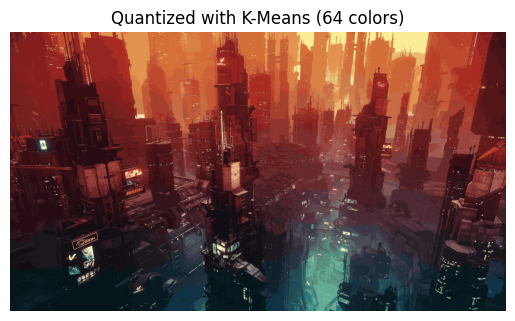

In [8]:
n_colors = 64

image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title(f'Quantized with K-Means ({n_colors} colors)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

print(kmeans.cluster_centers_)

[[0.83212349 0.45874009 0.24689195]
 [0.22666667 0.12235294 0.14970588]
 [0.66741363 0.25004669 0.17684407]
 [0.0475817  0.1222658  0.15738562]
 [0.97647059 0.67843137 0.64313725]
 [0.29063181 0.41481481 0.4248366 ]
 [0.13461799 0.04962813 0.07207573]
 [0.52018454 0.1313341  0.12333718]
 [0.10010893 0.18779956 0.24793028]
 [0.31434469 0.08613691 0.09893361]
 [0.75630252 0.54005602 0.43305322]
 [0.35522876 0.53071895 0.48071895]
 [0.42491349 0.16793541 0.17093426]
 [0.29465241 0.28146168 0.32032086]
 [0.87741935 0.56318786 0.31486401]
 [0.96772247 0.9188537  0.65972851]
 [0.04184544 0.08272203 0.104406  ]
 [0.62443439 0.1670186  0.13474108]
 [0.52794118 0.38333333 0.37254902]
 [0.20836601 0.19581699 0.24418301]
 [0.40539216 0.10702614 0.10996732]
 [0.78431373 0.73803922 0.6172549 ]
 [0.13398693 0.29084967 0.34248366]
 [0.12941176 0.09685363 0.11600547]
 [0.30862745 0.16313725 0.20235294]
 [0.79103641 0.38422035 0.22203548]
 [0.52972136 0.21991744 0.21682147]
 [0.39372549 0.6745098  0.59

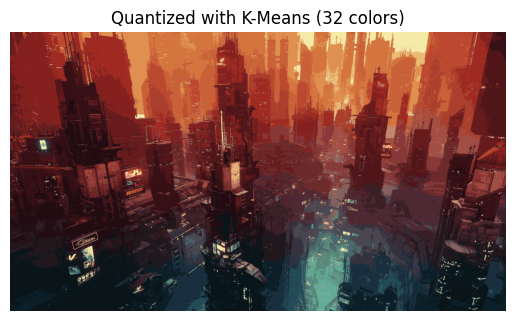

In [9]:
n_colors = 32

image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

plt.figure(3)
plt.clf()
plt.axis('off')
plt.title(f'Quantized with K-Means ({n_colors} colors)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

print(kmeans.cluster_centers_)

[[0.80861713 0.41073271 0.22848297]
 [0.29839216 0.11529412 0.13631373]
 [0.56880985 0.27952576 0.26994984]
 [0.03736589 0.10192379 0.12848687]
 [0.90457516 0.73986928 0.53812636]
 [0.35822021 0.52307692 0.48853695]
 [0.55803471 0.15451882 0.13856209]
 [0.25661765 0.26446078 0.30923203]
 [0.11331071 0.06749623 0.08868778]
 [0.42154754 0.13341767 0.13641155]
 [0.86623094 0.54684096 0.30466231]
 [0.70080738 0.26620531 0.18229527]
 [0.95518207 0.91428571 0.66330532]
 [0.12762923 0.18669043 0.23885918]
 [0.75860566 0.56122004 0.46884532]
 [0.21231964 0.06944136 0.09019608]]


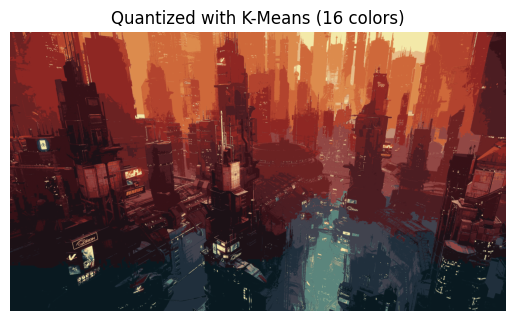

In [10]:
n_colors = 16

image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

plt.figure(4)
plt.clf()
plt.axis('off')
plt.title(f'Quantized with K-Means ({n_colors} colors)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

print(kmeans.cluster_centers_)

[[0.83024261 0.47537388 0.27121967]
 [0.25956492 0.09115208 0.11120866]
 [0.67660352 0.27128614 0.20279163]
 [0.07891723 0.08665626 0.11162589]
 [0.92188235 0.82917647 0.61270588]
 [0.36052288 0.50352941 0.47490196]
 [0.48315966 0.14937815 0.14545658]
 [0.19212021 0.22100055 0.27084479]]


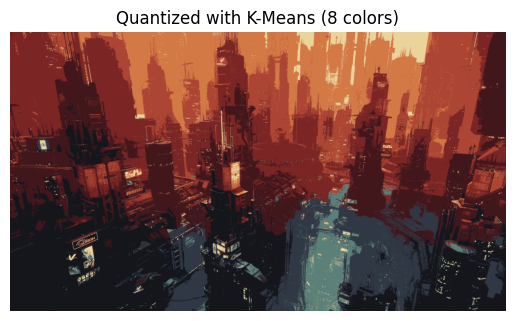

In [11]:
n_colors = 8

image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

plt.figure(5)
plt.clf()
plt.axis('off')
plt.title(f'Quantized with K-Means ({n_colors} colors)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

print(kmeans.cluster_centers_)

## Завдання 3: Обробка та класифікація текстових даних

In [12]:
from nltk import download
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import re

download('stopwords')

def clean_line(line, stop_words):
    """Clean text from numbers, punctuation and stop words"""
    line = line.lower()
    line = re.sub(r'@\S+', ' ', line)
    line = re.sub(r'https*\S+', ' ', line)
    line = re.sub(r'#\S+', ' ', line)
    line = re.sub(r'\d', ' ', line)
    line = re.sub(r'[%s]' % re.escape(punctuation), ' ', line)
    line = re.sub(r'\n', ' ', line)
    line = re.sub(r'\s{2,}',' ', line)
    line = ' '.join([token for token in line.split(' ') if token not in stop_words])
    return line

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lollo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
df_spotify = pd.read_csv('data/SpotifyReviews.csv')
df_spotify = df_spotify.dropna()

df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52686 entries, 0 to 52701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  52686 non-null  object
 1   label   52686 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [14]:
df_spotify.shape

(52686, 2)

In [15]:
TEXT_COLUMN_NAME = df_spotify.columns[0]
LABEL_COLUMN_NAME = df_spotify.columns[1]

df_spotify.columns

Index(['Review', 'label'], dtype='object')

In [16]:
df_spotify.head()

,Review,label
0,"Great music service, the audio is high quality...",POSITIVE
1,Please ignore previous negative rating. This a...,POSITIVE
2,"This pop-up ""Get the best Spotify experience o...",NEGATIVE
3,Really buggy and terrible to use as of recently,NEGATIVE
4,Dear Spotify why do I get songs that I didn't ...,NEGATIVE


In [17]:
from collections import Counter
Counter(df_spotify[LABEL_COLUMN_NAME])

Counter({'NEGATIVE': 29423, 'POSITIVE': 23263})

In [18]:
stop_words = stopwords.words('english')
df_spotify['Review'] = df_spotify['Review'].map(lambda line: clean_line(line, stop_words))

In [19]:
df_spotify.head()

,Review,label
0,great music service audio high quality app eas...,POSITIVE
1,please ignore previous negative rating app sup...,POSITIVE
2,pop get best spotify experience android annoyi...,NEGATIVE
3,really buggy terrible use recently,NEGATIVE
4,dear spotify get songs put playlist shuffle play,NEGATIVE


In [20]:
from wordcloud import WordCloud

def create_wordcloud(data_frame, label):
    text = ''
    for msg in data_frame[data_frame[LABEL_COLUMN_NAME] == label][TEXT_COLUMN_NAME]:
        msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(f'Word cloud for \'{label}\'')
    plt.show()

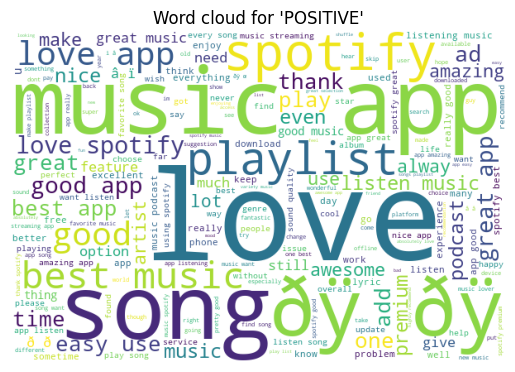

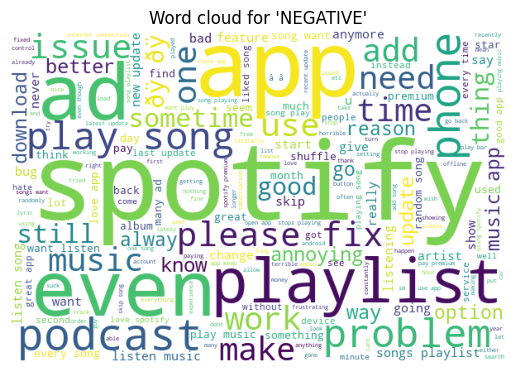

In [21]:
for label in set(df_spotify['label']):
    create_wordcloud(df_spotify, label)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(df_spotify[TEXT_COLUMN_NAME], df_spotify[LABEL_COLUMN_NAME], test_size=0.2)

len(X_train), len(y_train), len(X_test), len(y_test)

(42148, 42148, 10538, 10538)

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [54]:
from sklearn.naive_bayes import MultinomialNB

In [55]:
error_rate = {}

for a in [x / 10.0 for x in range(1, 20, 1)]:
    nb_trial = MultinomialNB(alpha=a)
    nb_trial.fit(X_train, y_train)
    pred_a = nb_trial.predict(X_test)
    error_rate[a] = (np.mean(pred_a != y_test))

In [56]:
alph = min(error_rate, key=error_rate.get)
alph, error_rate[alph]

(0.3, np.float64(0.14262668438033782))

In [57]:
classifier_nb = MultinomialNB(alpha=alph)
classifier_nb.fit(X_train, y_train)

naive_bayes_predict = classifier_nb.predict(X_test)

In [58]:
print(classification_report(y_test, naive_bayes_predict))
print(confusion_matrix(y_test, naive_bayes_predict))

              precision    recall  f1-score   support

    NEGATIVE       0.84      0.90      0.87      5740
    POSITIVE       0.88      0.80      0.84      4798

    accuracy                           0.86     10538
   macro avg       0.86      0.85      0.86     10538
weighted avg       0.86      0.86      0.86     10538

[[5191  549]
 [ 954 3844]]


In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

lr_predict = classifier.predict(X_test)

In [61]:
print(classification_report(y_test, lr_predict))
print(confusion_matrix(y_test, lr_predict))

              precision    recall  f1-score   support

    NEGATIVE       0.88      0.90      0.89      5740
    POSITIVE       0.88      0.85      0.86      4798

    accuracy                           0.88     10538
   macro avg       0.88      0.88      0.88     10538
weighted avg       0.88      0.88      0.88     10538

[[5185  555]
 [ 728 4070]]
